# 显示股票基本信息

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../qtrader/qtrader')

import pandas as pd
import numpy as np
import tushare as ts
from AData import SHSZData, SHSZSelection
import analysis
#import draw
import matplotlib.pyplot as plt

DATA_FOLRDER = '../data/SHSZ'

CODE='300628'

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
datamanager = SHSZData(DATA_FOLRDER)
equity = datamanager.get_basic(CODE)

## 1. 获取基本ochlv数据

In [3]:
df = datamanager.get_d(CODE)

def c_date(x):
    return [pd.datetime.strptime(str(i), '%Y-%m-%d') for i in x]
df[['date']] = df[['date']].apply(c_date)
df = df.set_index('date')

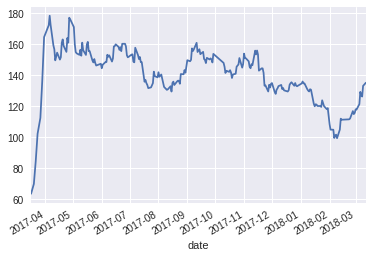

In [4]:
df.close.plot()

## 2. 获得每日涨跌幅分布统计

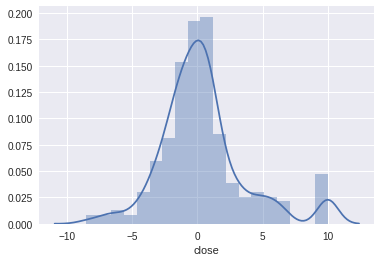

In [5]:
df['changeRatio'] = analysis.gen_change_ratio(df)

## 3. 获取每日振幅分布统计

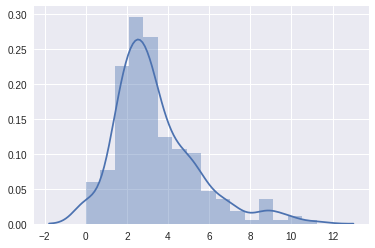

In [6]:
df['amplitude'] = analysis.gen_amplitude(df)

## 4. 获取跳空缺口
跳空缺口：

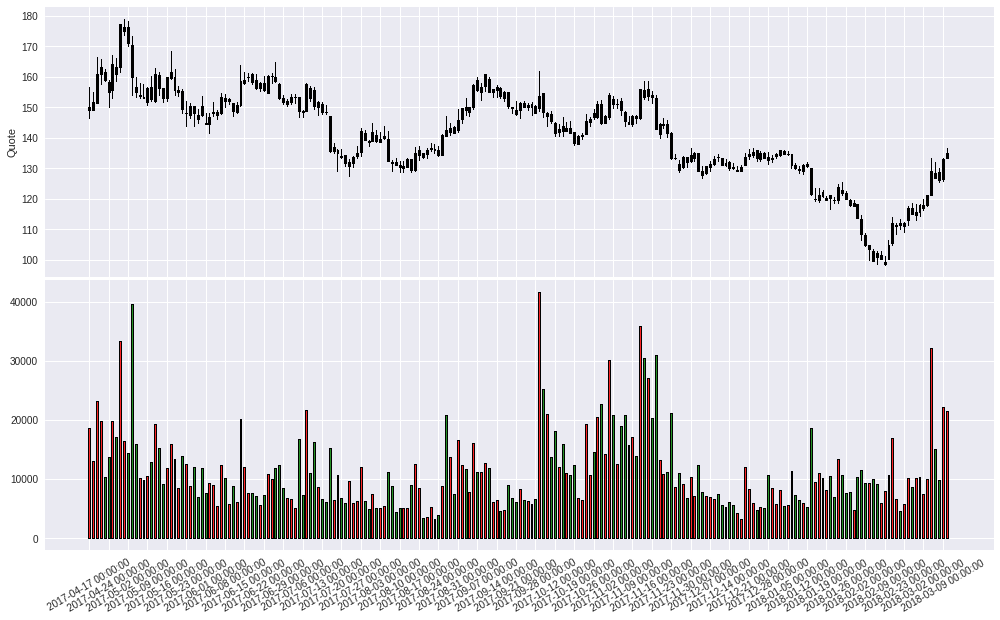

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
x = df.loc['2017-04-17':]
x['dump_power'] = analysis.gen_jump_powers(x)

## 5. 平滑close

(222,)

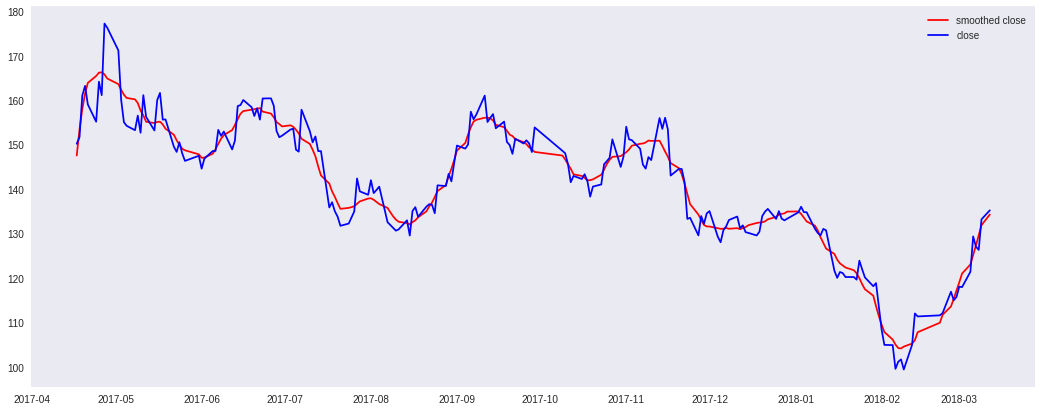

In [8]:
smoothed_cls = analysis.gen_smoothed_close(x['close'])
smoothed_cls.shape

## 6. 支撑线和阻碍线的获取

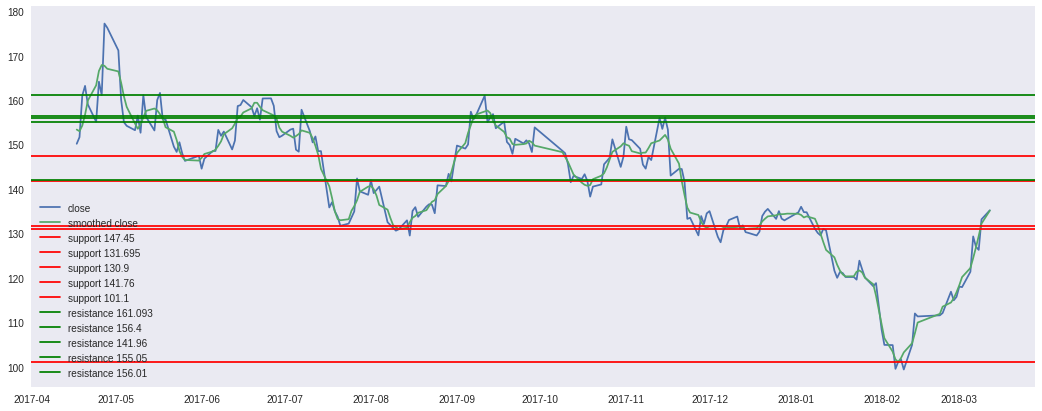

In [9]:
sup, res = analysis.gen_supres(x['close'])

## 7. 简单趋势分析

(-0.24248235294117651, -0.25822857142857147)

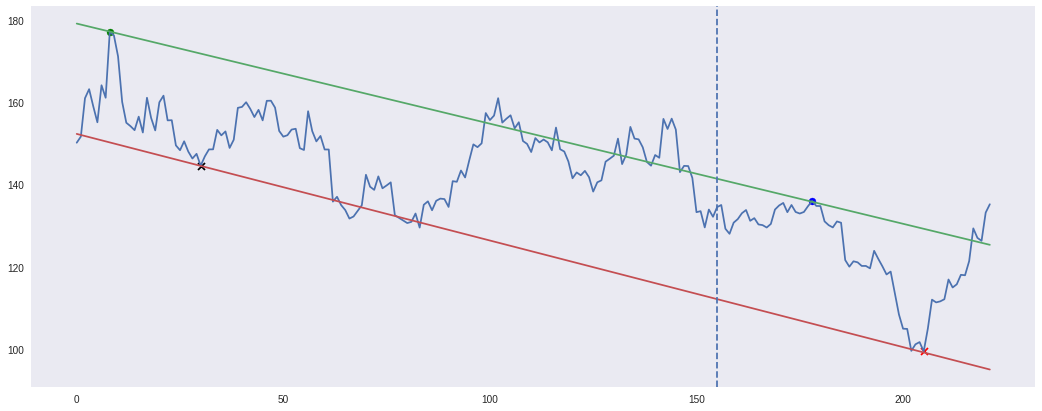

In [10]:
analysis.gen_trends(x['close'], 0.7)

## 8. 寻找拐点

([101.09999999999999, 101.64, 140.52000000000001, 160.35],
 [120.17, 139.06, 153.55000000000001, 177.202])

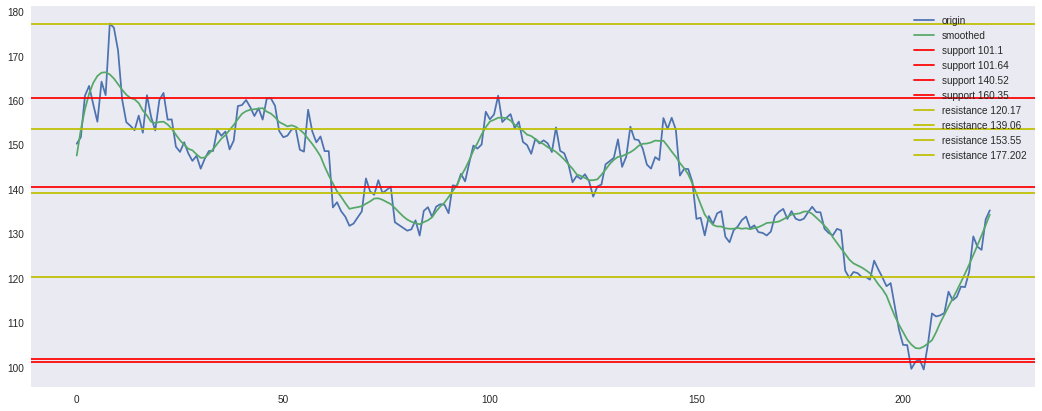

In [12]:

analysis.gen_stational_points(x['close'], num_class=3, delta=0.009, charts=True)